In [1]:
import cv2 as cv
import numpy as np
import roifile
import matplotlib.pyplot as plt

In [7]:
def convert_roi_to_label(label, rois):
    print("label shape: ", label.shape)
    print("no of unique labels: ", len(rois))

    for i in range(0, len(rois)):
        coord = rois[i].integer_coordinates
        top = rois[i].top
        left = rois[i].left
        coord[:, 0] = coord[:, 0] + left
        coord[:, 1] = coord[:, 1] + top

        contour = []
        for j in range(0, len(coord)):
            contour.append([ coord[j][0], coord[j][1] ])

        contour = np.asarray(coord).astype(np.int32)
        cv.fillPoly(label, pts=[contour], color=i)

    print("Show image: ")

    print("unique labels: ", np.unique(label))
    print("len unique labels: ", len(np.unique(label)))

    # cv.imwrite('Contours.png', img)
    plt.figure(figsize=(20,20))
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.subplot(1,2,2)
    plt.imshow(label)
    plt.show()

label shape:  (800, 800)
no of unique labels:  1678
Show image: 
unique labels:  [   0    1    2 ... 1675 1676 1677]
len unique labels:  1678


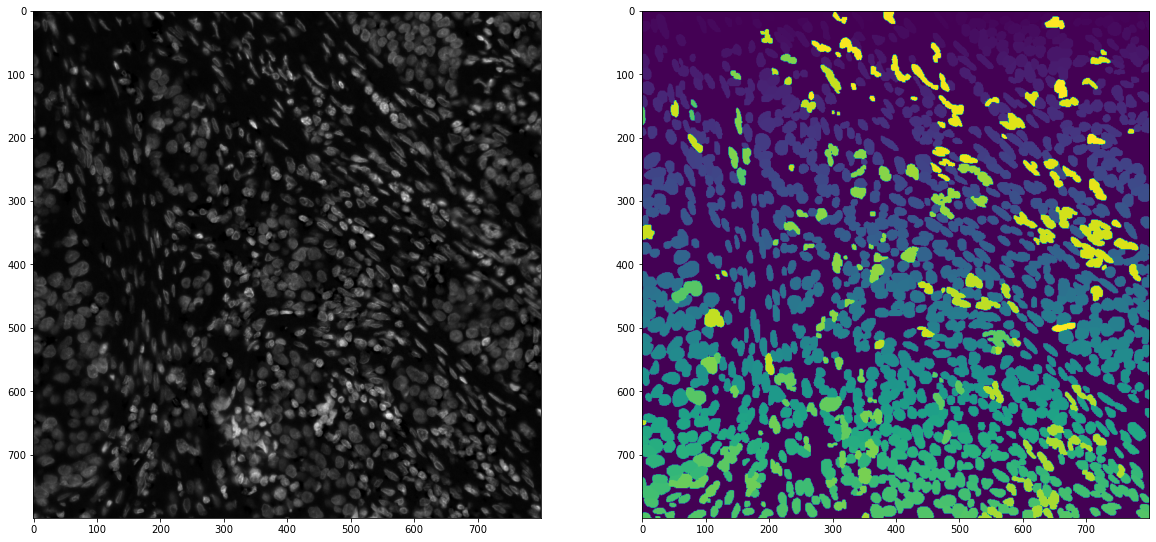

In [8]:
img = cv.imread("/nadeem_lab/Gunjan/combined_analysis/1-19568[58086,9988]1200,700/19568[58086,9988]1200,700-Crop_Dapi_Png.png")

filename_nathan = '/nadeem_lab/Gunjan/combined_analysis/1-19568[58086,9988]1200,700/nathans/19568[58086,9988]1200,700-Crop_Dapi_Mask_Roi_Zip.zip'
out_nathan = roifile.roiread(filename_nathan)
label_nathan = np.zeros((img.shape[0], img.shape[1])).astype(np.int32)
convert_roi_to_label(label_nathan, out_nathan )